In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from jacksonii_analyses import vcf_parser, clustering

In [2]:
from importlib import reload
reload(vcf_parser)
reload(clustering)

<module 'jacksonii_analyses.clustering' from '/workspace/jacksonii_analyses/clustering.py'>

In [3]:
variants = vcf_parser.vcf_to_geno_df(
    "../data/var/filtered_variants.vcf.gz",
)
variants.iloc[:5, :5]  # Display the first 5 rows and columns

,KI546309.1_21251,KI546309.1_21254,KI546309.1_21267,KI546309.1_21268,KI546309.1_21273
SRR30172785,0,0,0,0,0
SRR30172786,0,0,0,0,0
SRR30172787,0,0,0,0,0
SRR30172788,2,0,0,0,0
SRR30172789,2,0,0,0,0


In [4]:
pops = clustering.read_populations(
    "../data/samples/populations.txt",
)
pops.head()

,populations,populations_clean
sample,,
SRR30172785,Amanitajacksonii,A. jacksonii
SRR30172786,Amanitajacksonii,A. jacksonii
SRR30172787,Amanitajacksonii,A. jacksonii
SRR30172788,AmanitaspT31,A. sp T31
SRR30172789,AmanitaspT31,A. sp T31


In [5]:
pc_df = clustering.calculate_pca(
    geno_df=variants,
    n_components=2,
    pops=pops,
)
pc_df.head()

,PC1,PC2,populations
SRR30172785,-11.853130,-52.744402,A. jacksonii
SRR30172786,-12.212051,-53.691604,A. jacksonii
SRR30172787,-12.082291,-52.628492,A. jacksonii
SRR30172788,116.389853,21.533636,A. sp T31
SRR30172789,113.491136,19.316779,A. sp T31


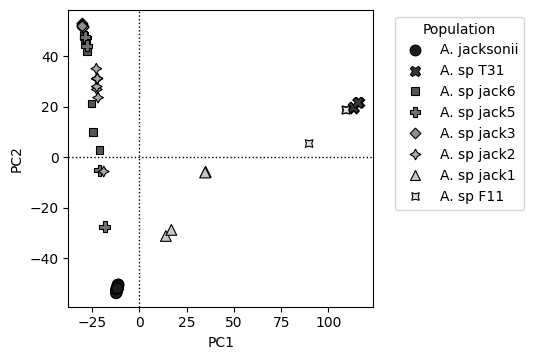

In [6]:
plt.figure(figsize=(5.5, 3.7))  # Smaller plot
sns.scatterplot(
    data=pc_df,
    x='PC1',
    y='PC2',
    hue='populations',
    style='populations',
    palette='gray',
    s=60,
    edgecolor='black',
    linewidth=0.8   
)
plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
plt.axvline(0, color='black', linestyle='dotted', linewidth=1)
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../data/var/pca_plot.svg")  # Save as SVG
plt.show()